<a href="https://colab.research.google.com/github/venuannamdas/12july/blob/main/California%20Housing%20Value%20_Estimates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Problem 1:**  Build a regression model to predict "median_house_value".
 Data - https://www.kaggle.com/datasets/camnugent/california-housing-prices  **

 --------

Problem Statement: Exploring Available Data related to housing in California for (1) Insights, and (2) Predicting House Value.


Problem Objective: To Build Linear Regression Models to Predict target (median_house_value) i.e 'y' using Predictor Variables, i.e X.


Solution: Applying Machine Learning Algorithms such as Univariant & Multi Variant linear Regression and Regularization. Estimate (a) Target Variable i.e median_house_value using (b) several independent variables, and finally, draw a ‘Value prediction/Regression line’

# 1. Dataset Loading

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict





In [2]:
# Loading dataset from a csv formatted file
housing_file = 'https://raw.githubusercontent.com/venuannamdas/Data2023/master/housing.csv'
housing=pd.read_csv(housing_file)

In [3]:
housing.sample(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15064    -116.96     32.79                35.0       1081.0           266.0   
9035     -117.84     34.63                 5.0       6739.0          1251.0   
1499     -122.04     37.95                33.0       1653.0           334.0   
14074    -117.12     32.76                27.0       1426.0           364.0   
9695     -121.61     36.68                37.0       3149.0           833.0   

       population  households  median_income  median_house_value  \
15064       691.0       259.0         2.6324            133700.0   
9035       4614.0      1266.0         4.0020            115100.0   
1499        814.0       328.0         3.1406            163100.0   
14074       792.0       353.0         2.0673            118800.0   
9695       3456.0       788.0         2.8542            127600.0   

      ocean_proximity  
15064       <1H OCEAN  
9035           INLAND  
1499         NEAR BAY  
14074      NEAR OCEAN  
9695        <1H OCEAN

 After loading the data and looking at the sample, we can say that our Target Variable is median_house_value and all other are predictor variables

# 2. Exploratory Data Analysis

Data-insights  through pre-processing
*   Data quality assessment (predictor variables & target variable)
*   Data cleaning
*   Data transformation
*   Data reduction



In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity  is an object while other are numeric columns

In [5]:
housing.shape

(20640, 10)

In [6]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [7]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
housing.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

ocean_proximity is an object and has only 5 unique values. let us investigate it further.

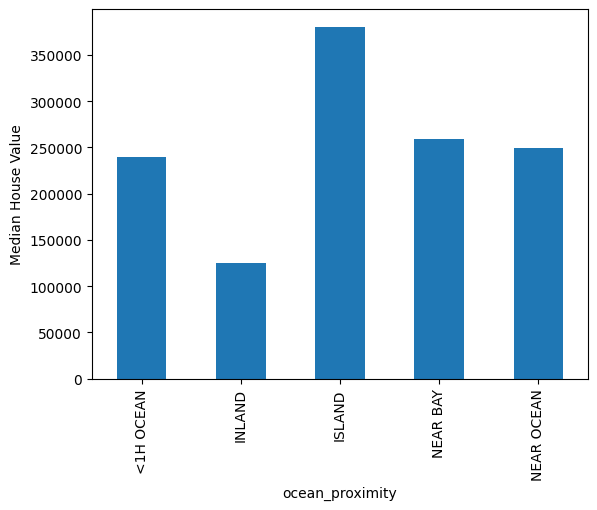

In [9]:
housing.groupby("ocean_proximity")['median_house_value'].mean().plot.bar()
plt.ylabel("Median House Value")
plt.show()

Let us further look into ocean proximity

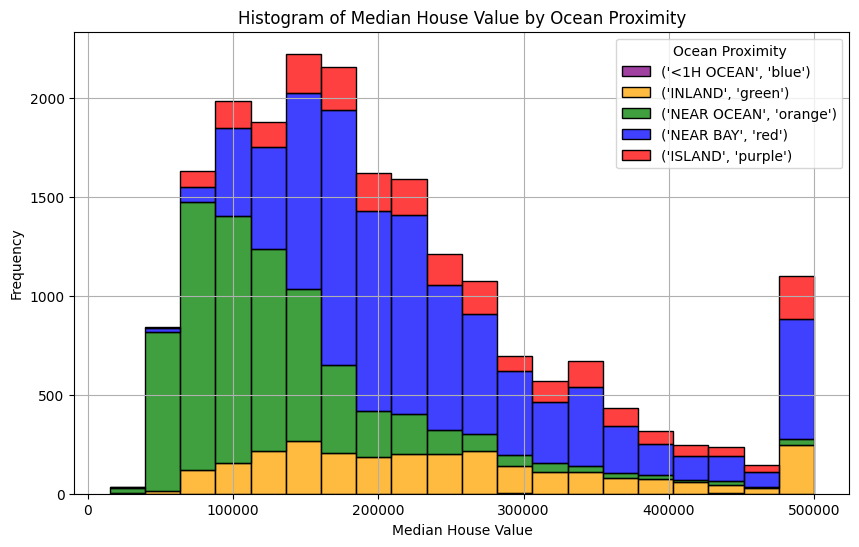

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'housing'

# Define custom colors for each category in "ocean_proximity"
colors = {'<1H OCEAN': 'blue', 'INLAND': 'green', 'NEAR OCEAN': 'orange', 'NEAR BAY': 'red', 'ISLAND': 'purple'}

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=housing, x="median_house_value", hue="ocean_proximity", palette=colors, bins=20, multiple="stack")

plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Histogram of Median House Value by Ocean Proximity')

# Create a custom legend with labels
legend_labels = [f"{category}" for category in colors.items()]
plt.legend(legend_labels, title='Ocean Proximity', loc='upper right')

plt.grid(True)
plt.show()

*Asumption :  uniform demand at all locations in the california.*

Column 'ocean_proximity' can be categorized into 5 groups or it can be one line hot coded and the data can be expanded. But for this learning-based project let us Assume that all locations have similar demand and drop it for simplicity.  

In [11]:
housing.drop(columns=['ocean_proximity'], inplace=True)


Let us look at all other predictor variables, target variable  and their distribution:

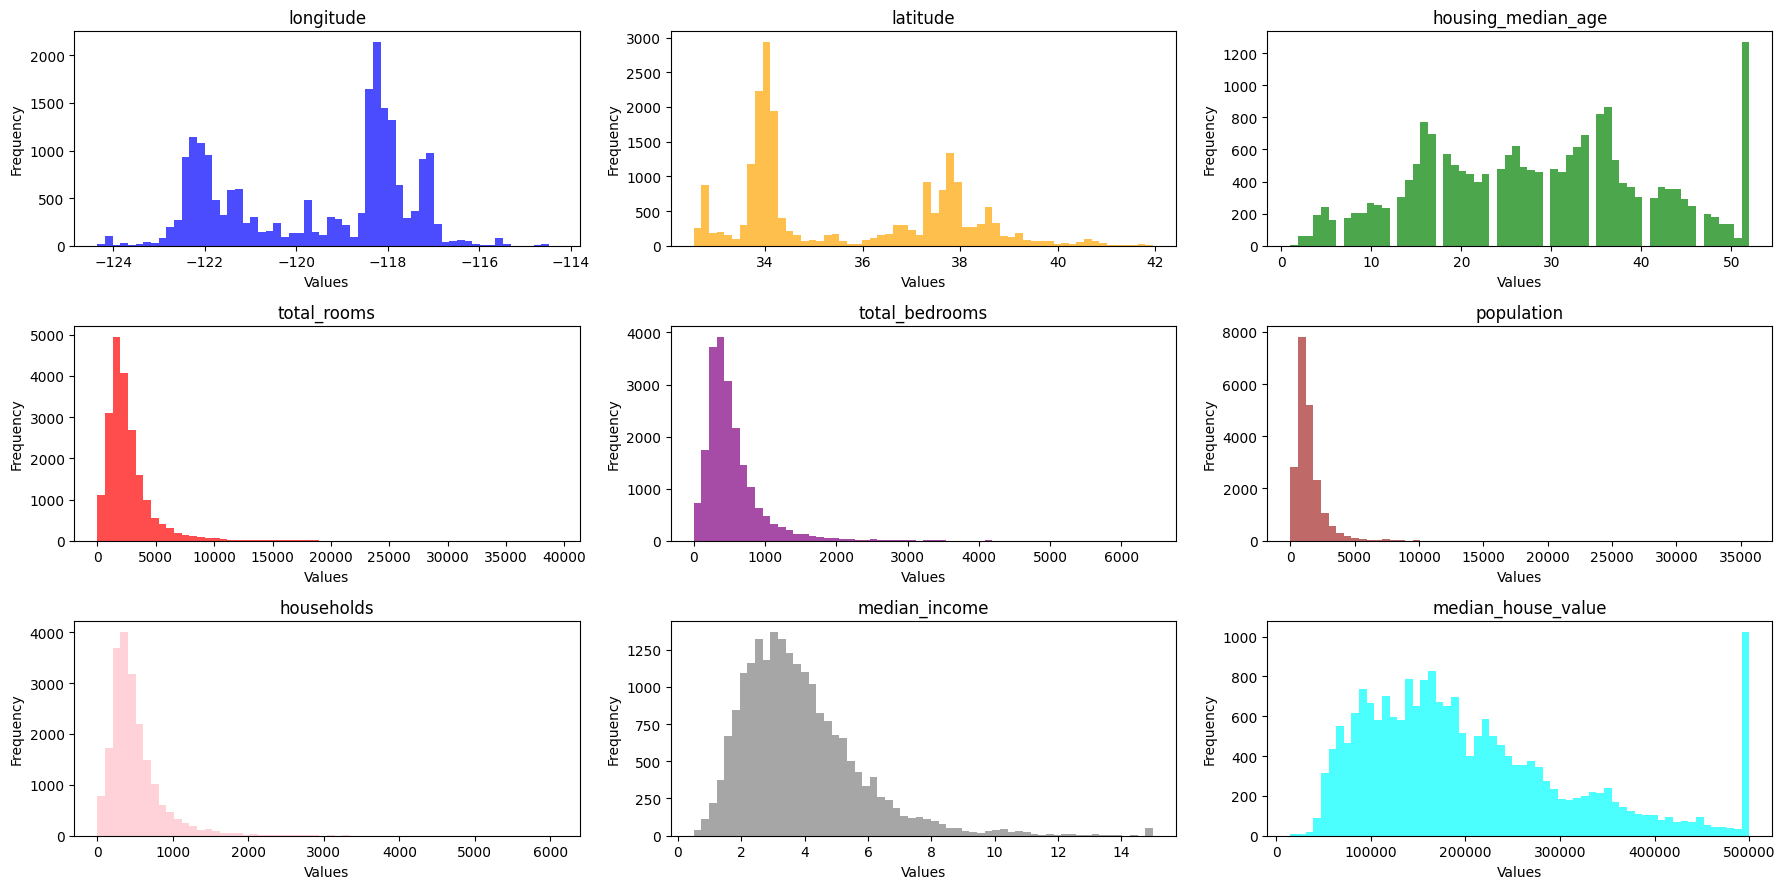

In [12]:
#import matplotlib.pyplot as plt

# Define a list of colors for each plot
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan']

# Get the number of columns in the DataFrame
num_columns = len(housing.columns)

# Calculate the number of rows and columns for the subplots
num_rows = (num_columns + 2) // 3  # Divide and round up

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 3 * num_rows))

# Flatten the 2D array of axes
axes = axes.flatten()

# Plot histograms for each column with different colors
for i, (column, ax) in enumerate(zip(housing.columns, axes)):
    ax.hist(housing[column], bins=60, color=colors[i % len(colors)], alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Let us look at the location through predictor variables 'longitude' & 'latitude', on the world map.

In [13]:
pip install geopandas

In [14]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<ipython-input-14-fb56bf95bef3>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


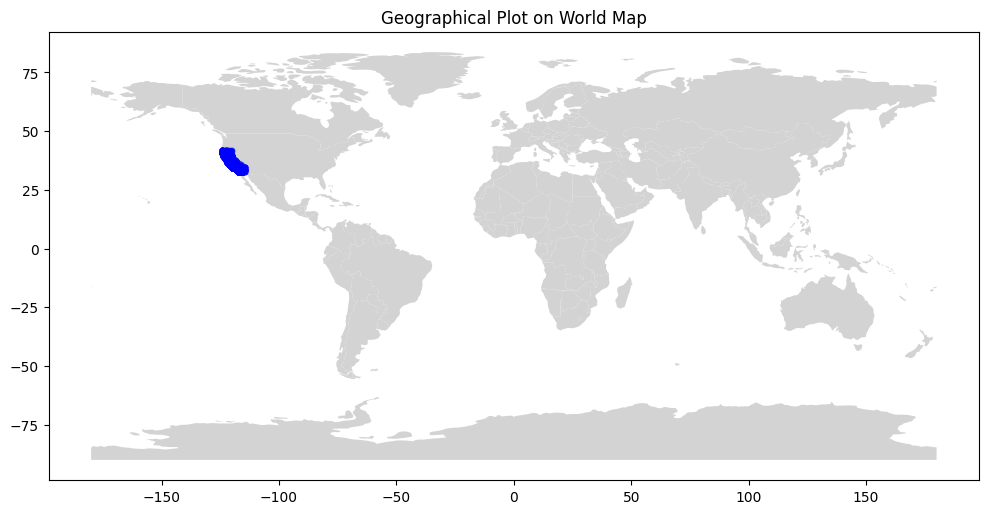

In [15]:
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Assuming you have a DataFrame named 'housing'
# Create a GeoDataFrame with longitude and latitude as Point geometry
geometry = [Point(lon, lat) for lon, lat in zip(housing['longitude'], housing['latitude'])]
gdf = gpd.GeoDataFrame(housing, geometry=geometry)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, color='blue', alpha=0.5)
ax.set_title('Geographical Plot on World Map')
plt.show()


Let us look at a closer look of the location, with additional information embedded on it

In [16]:
pip install folium


<Figure size 1000x700 with 0 Axes>

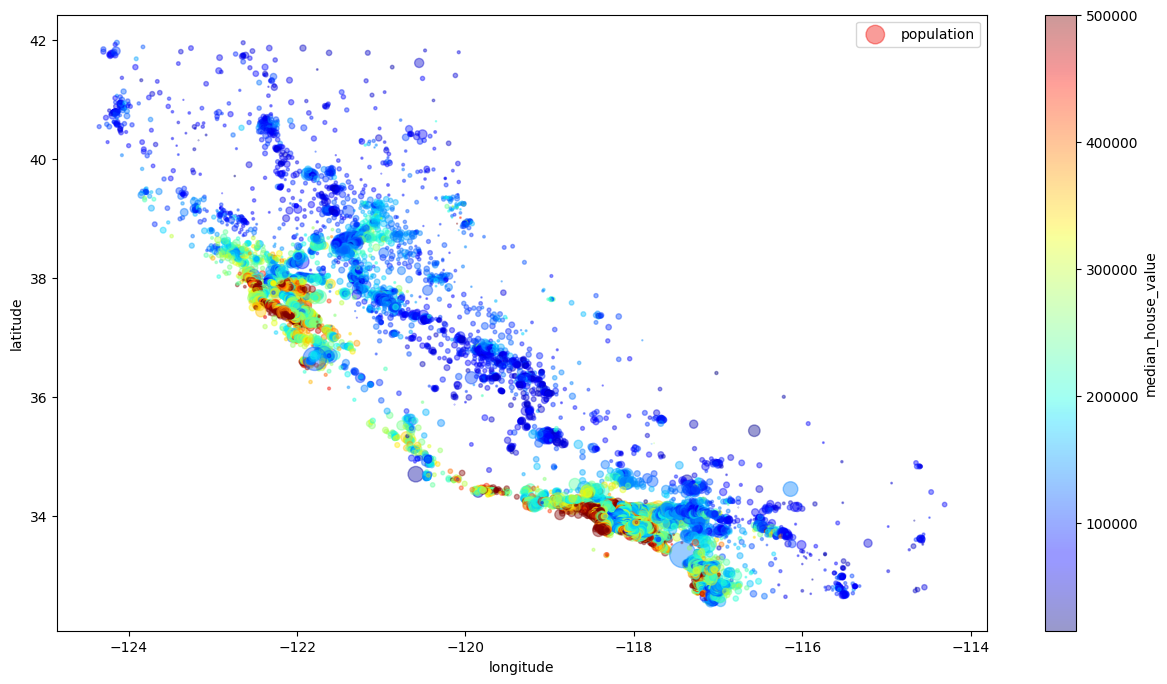

In [17]:
plt.figure(figsize=(10,7));
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, \
        s=housing["population"]/100, label="population", figsize=(15,8), \
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True, \
    );
plt.legend();

In [18]:
import geopandas as gpd
import folium

# Assuming you have a GeoDataFrame named 'gdf' with your data
# Create a map centered at a specific location (e.g., median latitude and longitude)
m = folium.Map(location=[gdf['latitude'].median(), gdf['longitude'].median()], zoom_start=6)

# Add markers with popups for each location in the GeoDataFrame
for idx, row in gdf.iterrows():
    # Create a marker at the latitude and longitude of the current row
    marker = folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Population: {row['population']}<br>Median House Value: ${row['median_house_value']}"
    )
    marker.add_to(m)

# Add a title to the map
folium.TileLayer('cartodb positron').add_to(m)
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('geographical_plot_with_markers.html')



In [45]:
import geopandas as gpd
import folium
import numpy as np

# Assuming you have a GeoDataFrame named 'gdf' with your data
# Limit the GeoDataFrame to the first 300 rows
gdf = gdf.head(500)

# Add latitude and longitude columns to the GeoDataFrame
gdf['latitude'] = gdf['geometry'].apply(lambda geom: geom.y)
gdf['longitude'] = gdf['geometry'].apply(lambda geom: geom.x)

# Define a color scale based on 'median_house_value' ranges
def get_color(value):
    if value <= 200000:
        return 'green'
    elif value <= 300000:
        return 'blue'
    elif value <= 400000:
        return 'yellow'
    else:
        return 'red'

# Create a map centered at the specified latitude and longitude with a higher zoom level
m = folium.Map(location=[37.81, -122.23], zoom_start=10)  # Adjust the zoom level

# Add markers with popups for each location in the GeoDataFrame
for idx, row in gdf.iterrows():
    # Create a marker at the latitude and longitude of the current row
    color = get_color(row['median_house_value'])

    # Create a note below the map details
    note_html = f"""
    <div> <br><br>
        <b>Details:</b><br>
        <p>Population: {row['population']}</p>
        <p>Median House Value: ${row['median_house_value']}</p>
        <p>Households: {row['households']}</p>
        <p>Median Income: ${row['median_income']}K per month</p>
        Desgined by: Venu Gopal Madhav Annamdas, PhD <BR>
        (House value are obtained from OLD data, you need to contact appropriate authorities to get latest info. Use this only for study purpose)
    </div>
    """

    # Include the note below the popup content
    popup_html = f"""
    <div>
        <b>Latitude:</b> {row['latitude']}<br>
        <b>Longitude:</b> {row['longitude']}<br>
        {note_html}
    </div>
    """

    marker = folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_html, max_width=300),  # Use Popup for multi-line content
        icon=folium.Icon(color=color)
    )
    marker.add_to(m)

# Add a title to the map
folium.TileLayer('cartodb positron').add_to(m)
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('Housing Estimates in California.html')





<ipython-input-45-2cec813b914e>:57: UserWarning: color argument of Icon should be one of: {'gray', 'pink', 'white', 'darkblue', 'lightblue', 'beige', 'lightgray', 'lightgreen', 'blue', 'purple', 'black', 'red', 'darkred', 'darkgreen', 'orange', 'lightred', 'green', 'darkpurple', 'cadetblue'}.
  icon=folium.Icon(color=color)


The insights into these data shows that, latitude and longitude are important information as the median_house_value is dependent on location in general. Here the data indicates that the location is in california. However, the rich are concentrated at certain pockets while huge populations especially lower and medium house value occupants are spead accross the california.

Let us find missing data in our housing dataset, if any

In [17]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

<Axes: >

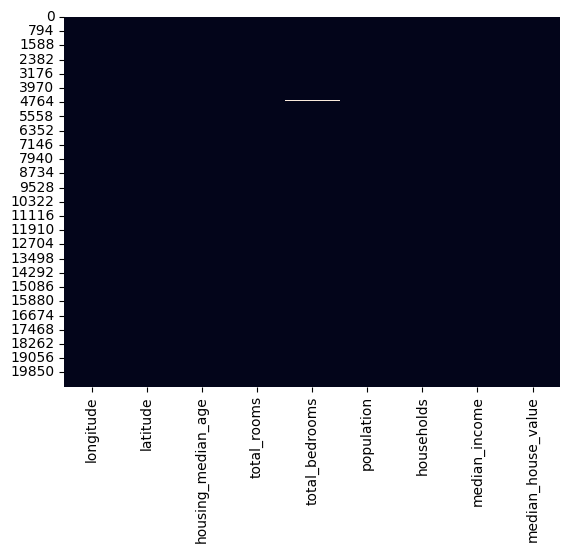

In [18]:
sns.heatmap(housing.isnull(), cbar=False)

In [19]:
rows_with_missing_bedrooms = housing[housing['total_bedrooms'].isnull()]
rows_with_missing_bedrooms.sample(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15607    -116.66     32.79                13.0        843.0             NaN   
13706    -117.22     34.11                26.0       2972.0             NaN   
9845     -121.90     36.58                31.0       1431.0             NaN   
7763     -118.10     33.91                36.0        726.0             NaN   
6590     -118.18     34.19                48.0       1371.0             NaN   

       population  households  median_income  median_house_value  
15607       918.0       152.0         6.2152            240600.0  
13706      1972.0       532.0         2.0388             80400.0  
9845        704.0       393.0         3.1977            289300.0  
7763        490.0       130.0         3.6389            167600.0  
6590        528.0       155.0        15.0001            500001.0


**we will check pairplot to see interdependencies between variables which can help us in filling the missing values**

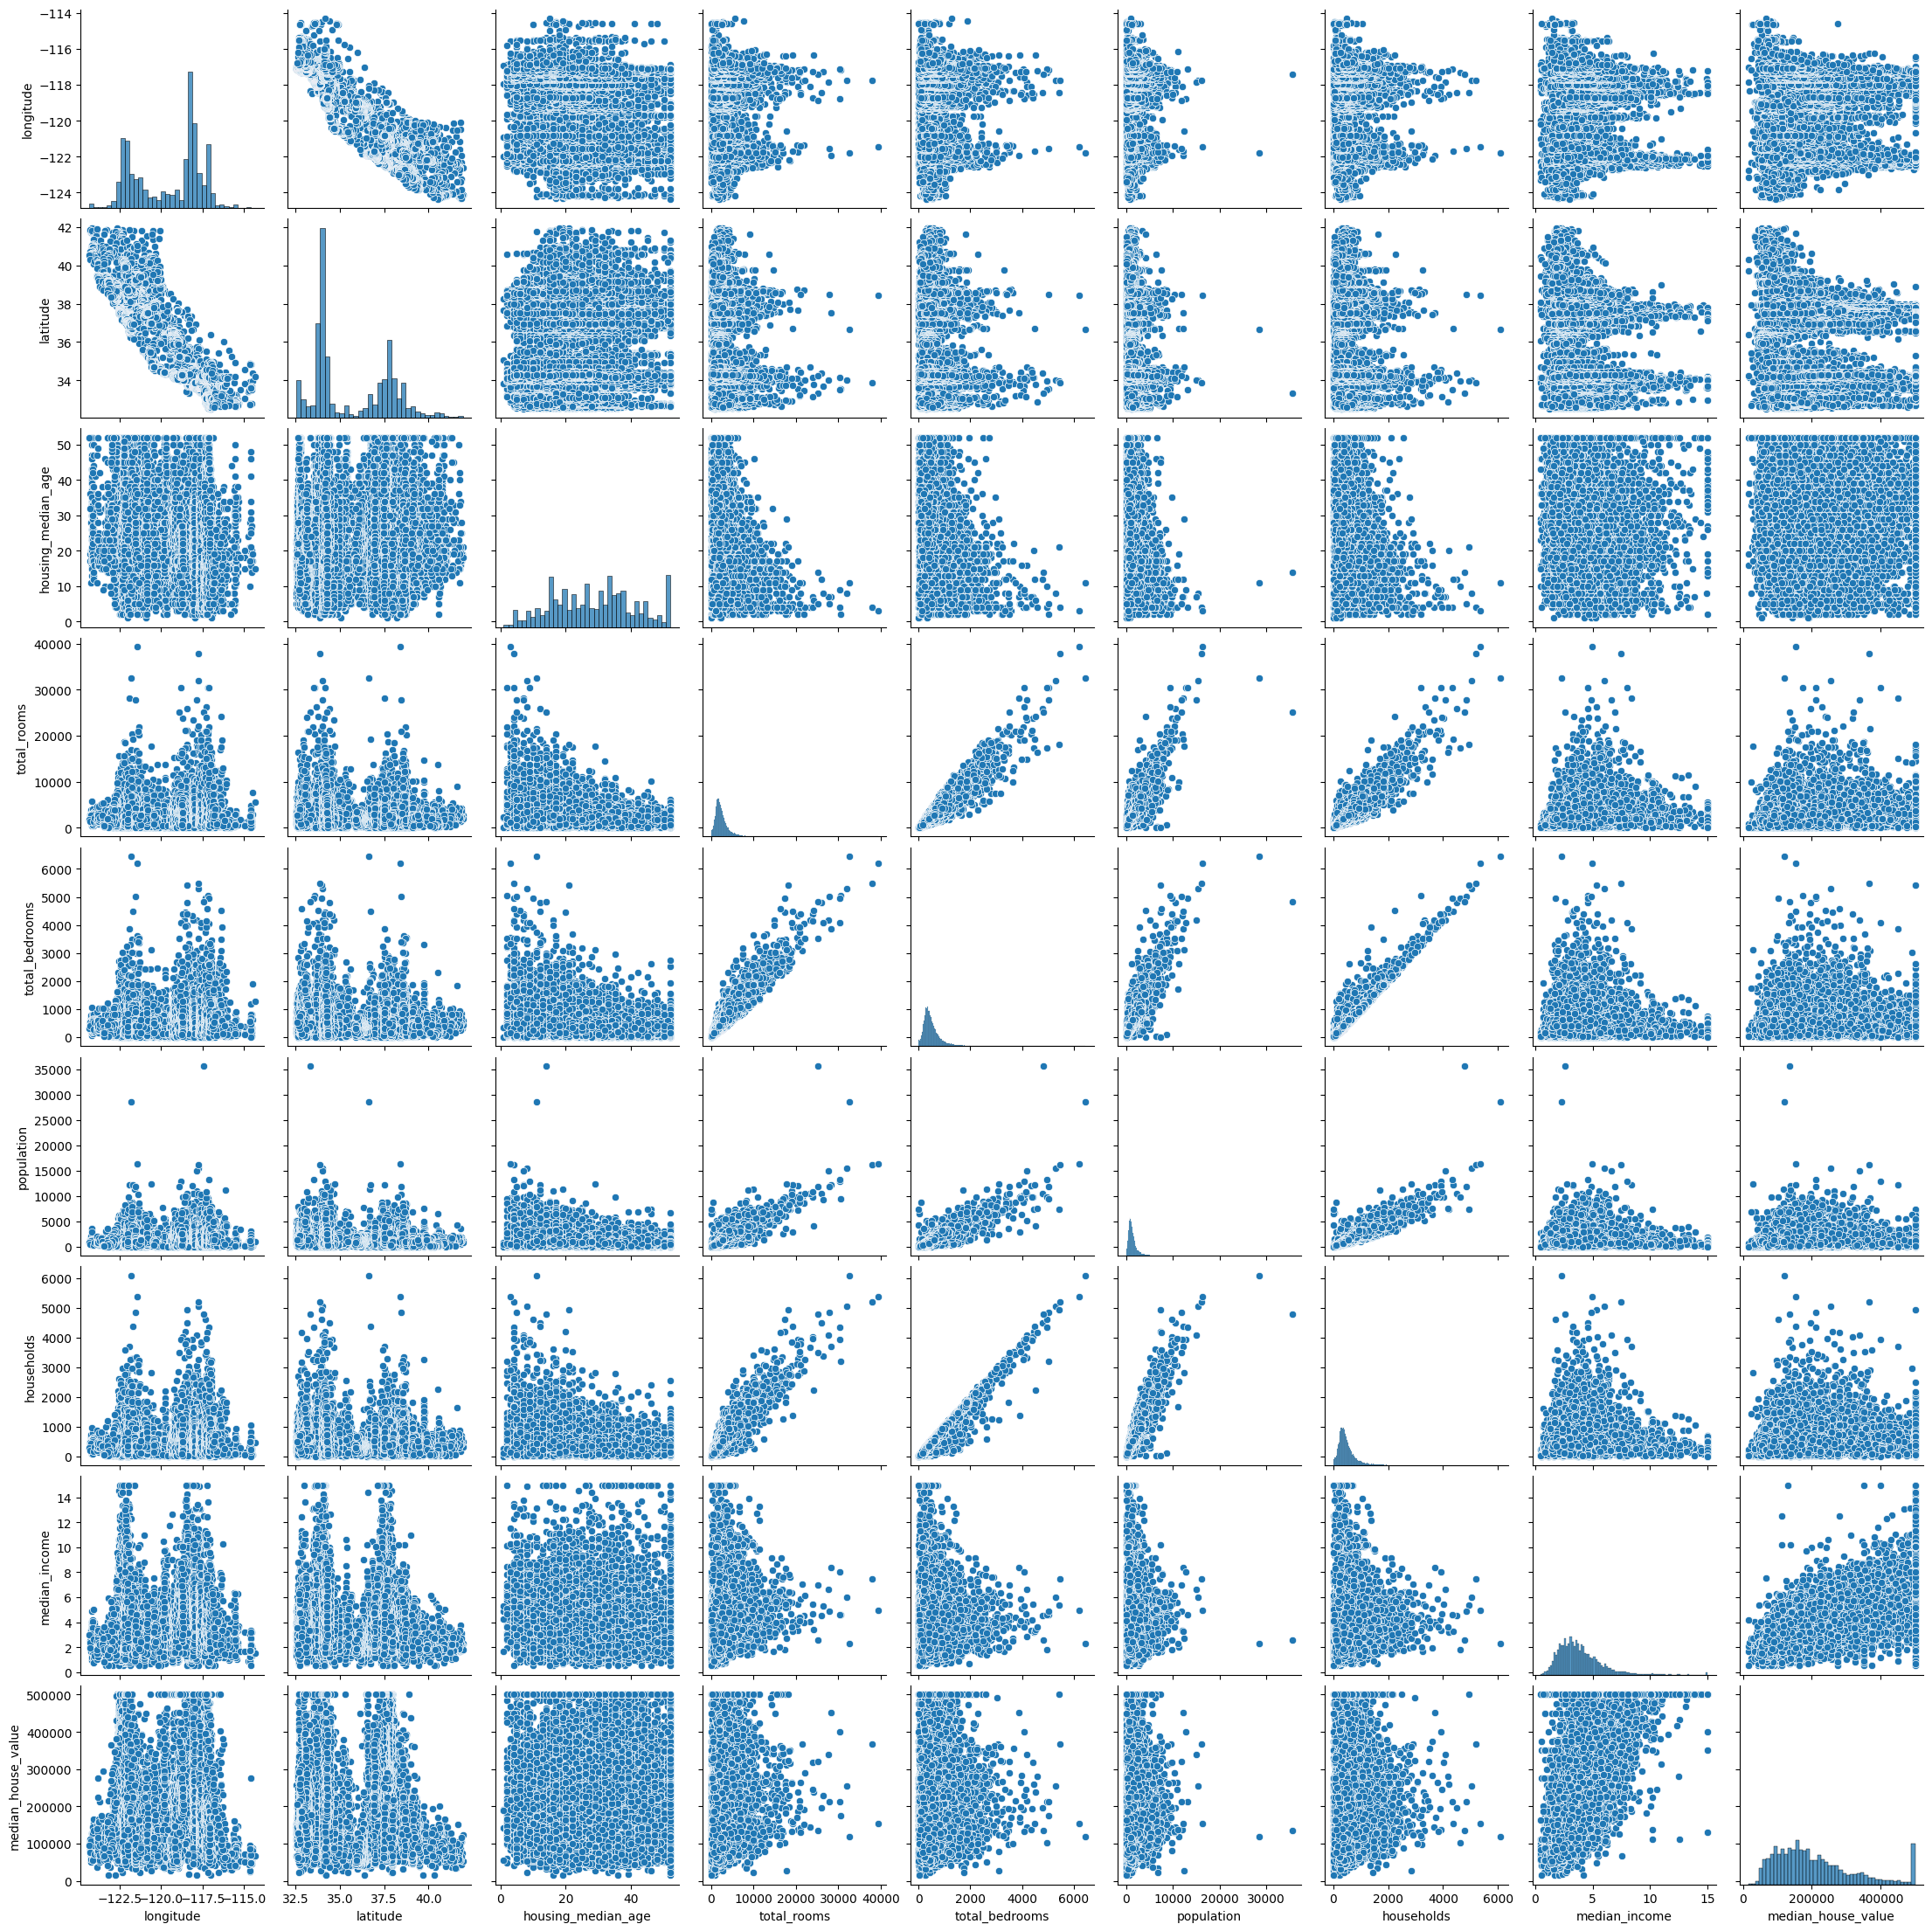

In [20]:
housing = pd.DataFrame(housing)

# Create a pair plot using Seaborn
sns.pairplot(housing)

# Show the plot
plt.show()

a closer observations of these plots reveal that
 total_bedrooms is directly proportional to 'households', 'population' and 'total_rooms' (as observed in pairplot). let us see them individually to better understand 'Column Interdependencies' for filling missing values

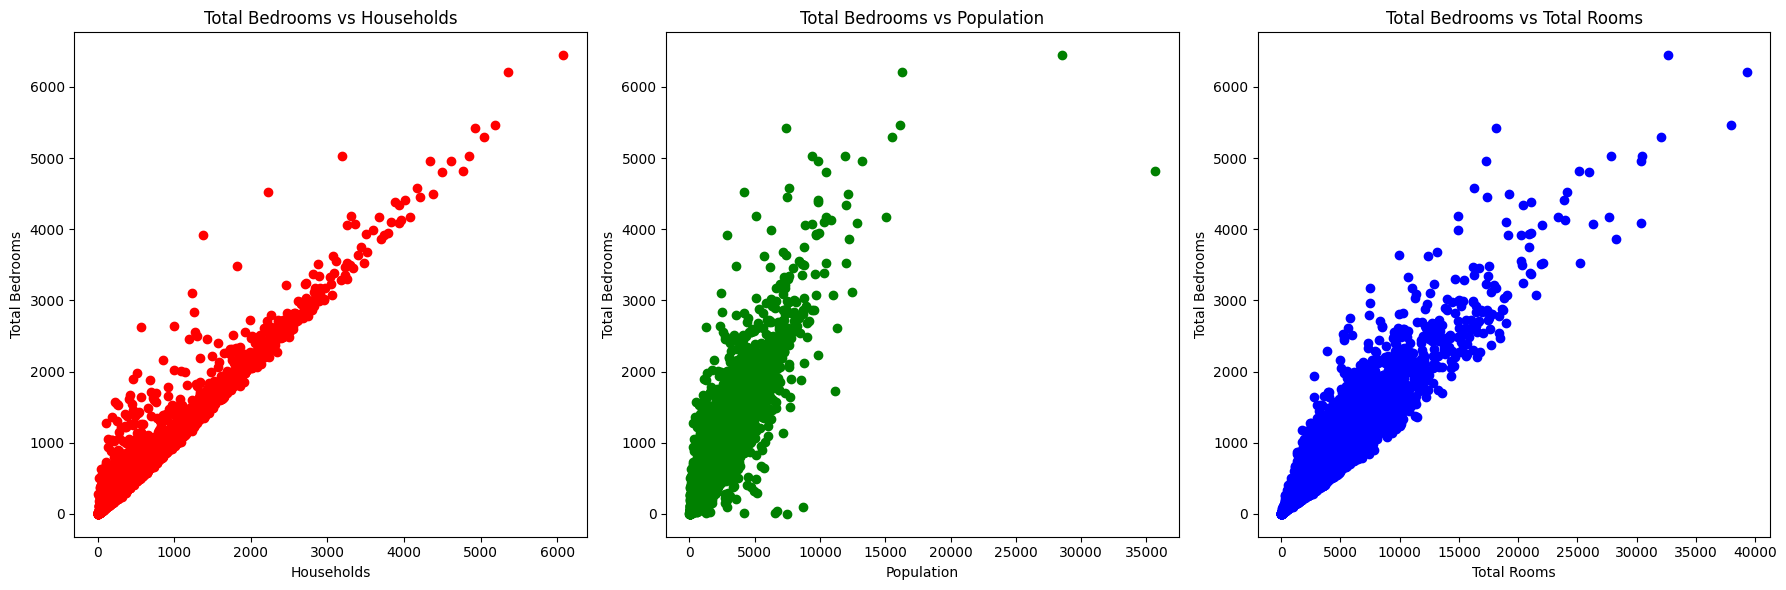

In [21]:
import matplotlib.pyplot as plt

# Create a 1x3 subplot grid
plt.figure(figsize=(18, 6))

# First subplot
plt.subplot(1, 3, 1)
plt.scatter(housing['households'], housing['total_bedrooms'], color='red')
plt.xlabel('Households')
plt.ylabel('Total Bedrooms')
plt.title('Total Bedrooms vs Households')

# Second subplot
plt.subplot(1, 3, 2)
plt.scatter(housing['population'], housing['total_bedrooms'], color='green')
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.title('Total Bedrooms vs Population')

# Third subplot
plt.subplot(1, 3, 3)
plt.scatter(housing['total_rooms'], housing['total_bedrooms'], color='blue')
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.title('Total Bedrooms vs Total Rooms')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


Note: among the three plots, total_bedrooms (Y) and households(X) have better proportionality, Y = X  (approx.). so let us fillup the missing values based on the assumption that these two are directly dependent on eachother.

**Filling-up the missing values in 'total_bedrooms' based on households**

In [22]:
def missing_values(housing):
    for index, row in housing[housing['total_bedrooms'].isnull()].iterrows():
        housing.loc[index, 'total_bedrooms'] = row['households']

missing_values(housing)

<Axes: >

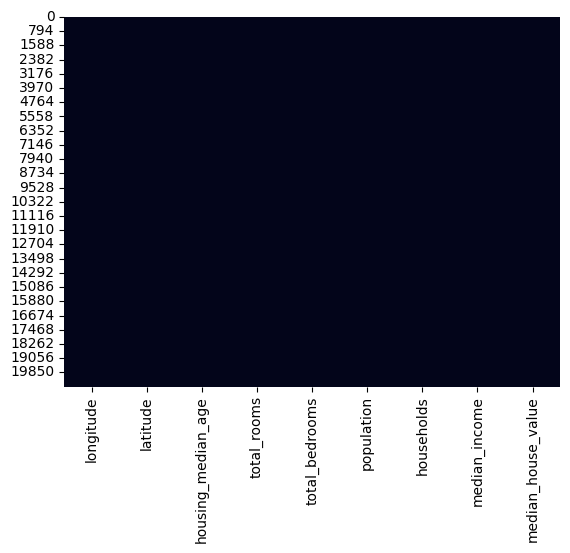

In [23]:
sns.heatmap(housing.isnull(), cbar=False)

**nomore white lines i.e all are filled**

#3. Data Processing and Application for univarient and multi variant based Linear Regression Models

We need to process the data closely, for which first we need to know our predictor variable clearly. Predictor variables are "longitude,	latitude,	housing_median_age,	total_rooms,	total_bedrooms,	population,	households,	median_income,	median_house_value". Next we need to understand our target variable (median_house_value) and its Interdependencies with predictor variables interms of numerical values (correlation coefficients).

In [24]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0

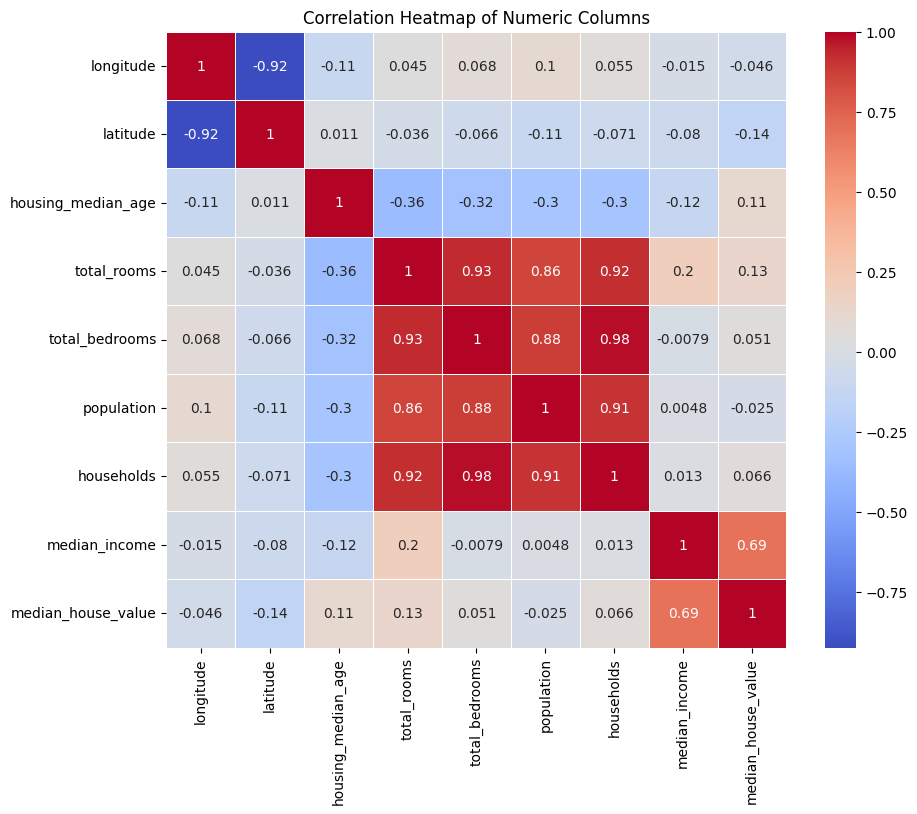

In [25]:
numeric_columns = housing.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

# heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

From correlation, we can say that the most important parameter for median_house_value prediction is median_income with 0.69. Let us plot a graph to see their dependencies and futher do Linear regression for univariant

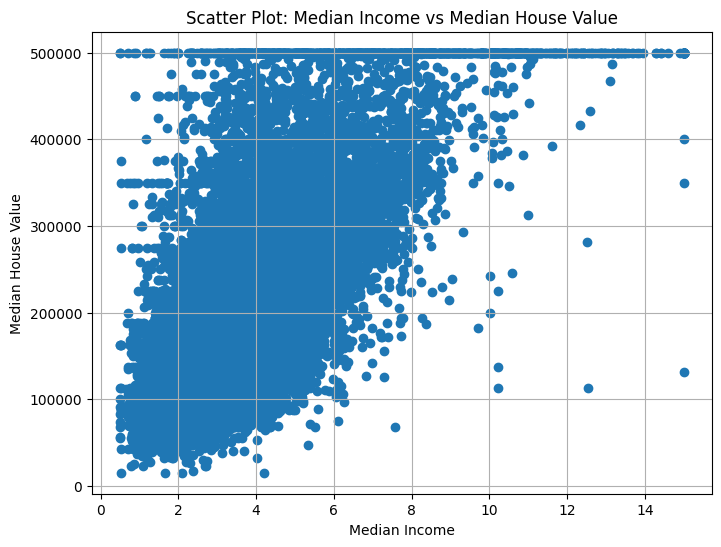

In [26]:
# Extraction ot the data for Xm and y
Xm = housing['median_income']
y = housing['median_house_value']

# Creation of a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Xm, y)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter Plot: Median Income vs Median House Value')
plt.grid(True)
plt.show()

From the plot we can say that there are many Outliers. so let us continue to built our regression model first, then consider dropping outliers to improve the model's efficiency if required

**3.1 Univariant Linear regression** using OLS:(It doesn't involve the concept of splitting data into training and testing sets).

In [27]:

import pickle
import statsmodels.api as sm

Xm = housing['median_income']
y = housing['median_house_value']

# Define the parameter grid (intercept values to try)
param_grid = {
    'intercept': [True, False]
}

# Initialization for storing results
results = []
r_squared_values = []

for intercept_value in param_grid['intercept']:
    if intercept_value:
        x = sm.add_constant(Xm)  # Include the intercept
    else:
        x = Xm  # Exclude the intercept

    model_OLS = sm.OLS(y, x)
    model_OLS_FIT = model_OLS.fit()
    r_squared = model_OLS_FIT.rsquared
    r_squared_values.append(r_squared)
    results.append((intercept_value, model_OLS_FIT))

# Print the summary table for each model
for intercept_value, result in results:
    print(result.summary())
    print("=" * 80)


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:07:49   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.509e+04   1322.872     34.082

Let us plot Regression lines

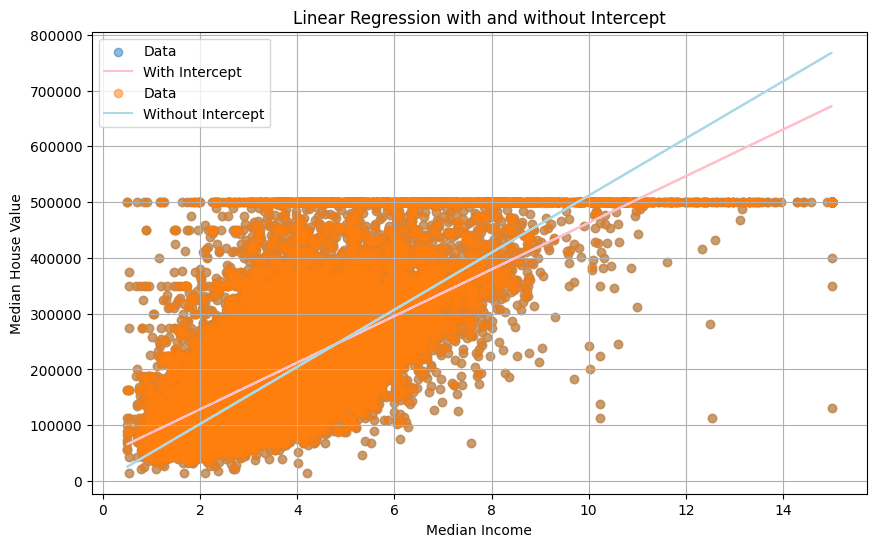

In [28]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have defined Xm, y, results, intercept_value, result

# Plot the data points and regression lines
plt.figure(figsize=(10, 6))
for i, (intercept_value, result) in enumerate(results):
    if intercept_value:
        label = 'With Intercept'
        color = 'pink'
    else:
        label = 'Without Intercept'
        color = 'lightblue'

    data_color = f'C{i}'  # Different color for each iteration
    plt.scatter(Xm, y, label='Data', alpha=0.5, c=data_color)
    plt.plot(Xm, result.predict(), label=label, color=color)

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression with and without Intercept')
plt.legend()
plt.grid(True)
plt.show()


we can say that the presence of intercept decreases Regression Results.

LET US LOOK AT OUTLIERS

In [29]:
import pandas as pd

# Set the threshold for Z-score based outlier detection
threshold = 3

# Create a DataFrame to store outliers
outliers = pd.DataFrame()

# Choose the specific column for outlier detection
col = 'median_income'

# Calculate mean and standard deviation for the chosen column
col_mean = housing[col].mean()
col_std = housing[col].std()

# Calculate Z-scores for the column
z_scores = (housing[col] - col_mean) / col_std

# Identify and store the rows with Z-scores exceeding the threshold
col_outliers = housing[abs(z_scores) > threshold]

In [ ]:
housing['median_income'].shape

(20640,)

In [ ]:
outliers_ratio = 345/20640
outliers_ratio

0.016715116279069766

**let us drop these 345 rows as the outliers ratio is very less**

In [ ]:
# Drop rows with Z-scores exceeding the threshold
housing_no_outliers = housing[abs(z_scores) <= threshold]

Univariant Linear regression (repeat after reduction of data i.e removal of outliers)

In [ ]:
Xmo = housing_no_outliers['median_income']
y= housing_no_outliers['median_house_value']


param_grid = {
    'intercept': [0.0, 1.0]
}

# initialization for storing results
results = []
r_squared_values2 = []

for intercept_value in param_grid['intercept']:
    if intercept_value == 0:
        x = sm.add_constant(Xmo)  # Include the intercept (default behavior)
    else:
        x = Xmo  # Exclude the intercept

    model_OLS = sm.OLS(y, x)
    model_OLS_FIT = model_OLS.fit()
    r_squared = model_OLS_FIT.rsquared
    r_squared_values2.append(r_squared)
    results.append((intercept_value, model_OLS_FIT))

# Print the summary table for each model
for intercept_value, result in results:
    print(result.summary())
    print("=" * 80)

# Print the R-squared values
for intercept_value, r_squared in zip(param_grid['intercept'], r_squared_values2):
    print(f"R-squared: {r_squared:.4f}")
    print("=" * 80)


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 1.544e+04
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:02:40   Log-Likelihood:            -2.5872e+05
No. Observations:               20295   AIC:                         5.174e+05
Df Residuals:                   20293   BIC:                         5.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.317e+04   1480.468     22.406

Regression Line

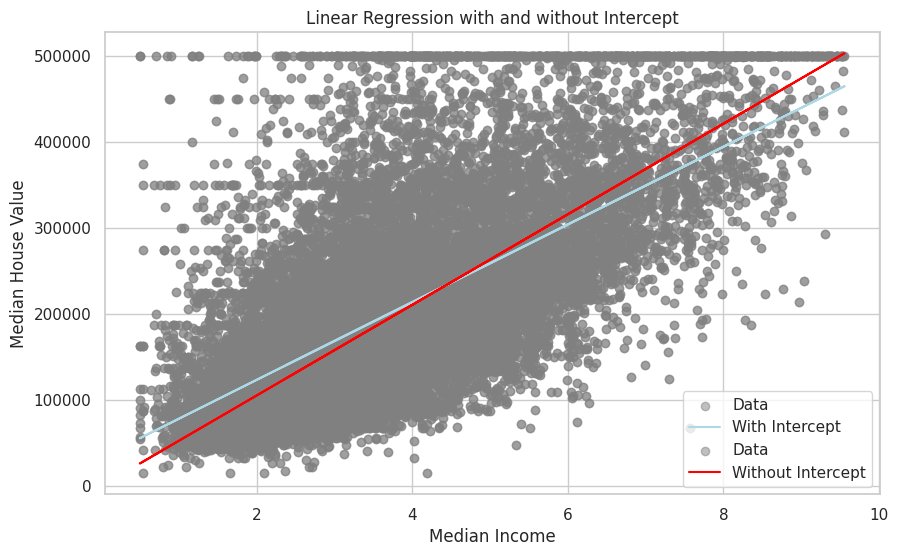

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot the data points and regression lines
plt.figure(figsize=(10, 6))
for intercept_value, result in results:
    if intercept_value:
        label = 'Without Intercept'
        color = 'red'
    else:
        label = 'With Intercept'
        color = 'lightblue'

    plt.scatter(Xmo, y, label='Data', alpha=0.5, c='gray')
    plt.plot(Xmo, result.predict(), label=label, color=color)

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression with and without Intercept')
plt.legend()
plt.grid(True)
plt.show()

Let us compare r-square values for (1) before and (2) after removing outliers

In [ ]:
# Comparing R-squared values before and after removing outliers
print("Comparing R-squared values before and after removing outliers:")
print("(a) With/ without intercept keeping outliers")
print(f"R-squared values: {r_squared_values[0]}, {r_squared_values[1]}")
print("(b) With/ without intercept removing outliers")
print(f"R-squared values: {r_squared_values2[0]}, {r_squared_values2[1]}")


Comparing R-squared values before and after removing outliers:
(a) With/ without intercept keeping outliers
R-squared values: 0.47344749180719903, 0.8679984529716042
(b) With/ without intercept removing outliers
R-squared values: 0.4320593929867468, 0.8663756262775698


Conclusion for Univarient Regression Model:The regression results for  Xmo (housing['median_income']), dropped slightlycompared to original data Xm. so let us go back to original dataset Xm. i.e no need to remove any outliers in univarient -linear regression.

-- Finished univariant Linear regression model------

new let us do



**3.2. Multi variant Linear Regression:** Let's include few more predictor variables so that over-all Regression Result can improves.

Checking for outliers in all numeric columns using Z-score

In [ ]:
# Set the threshold for Z-score based outlier detection
threshold = 3

# Create a DataFrame to store outliers
outliers = pd.DataFrame()

# Iterate through each numeric column
for col in numeric_columns.columns:
    col_mean = numeric_columns[col].mean()
    col_std = numeric_columns[col].std()

    # Calculate Z-scores for the column
    z_scores = (numeric_columns[col] - col_mean) / col_std

    # Identify and store the rows with Z-scores exceeding the threshold
    col_outliers = numeric_columns[abs(z_scores) > threshold]
    outliers = pd.concat([outliers, col_outliers])



(% of outlier compared to original housing data)

In [ ]:
rows_ratio = 1794 / 20640
(rows_ratio)

0.08691860465116279

let us plot boxplot to see the outliers

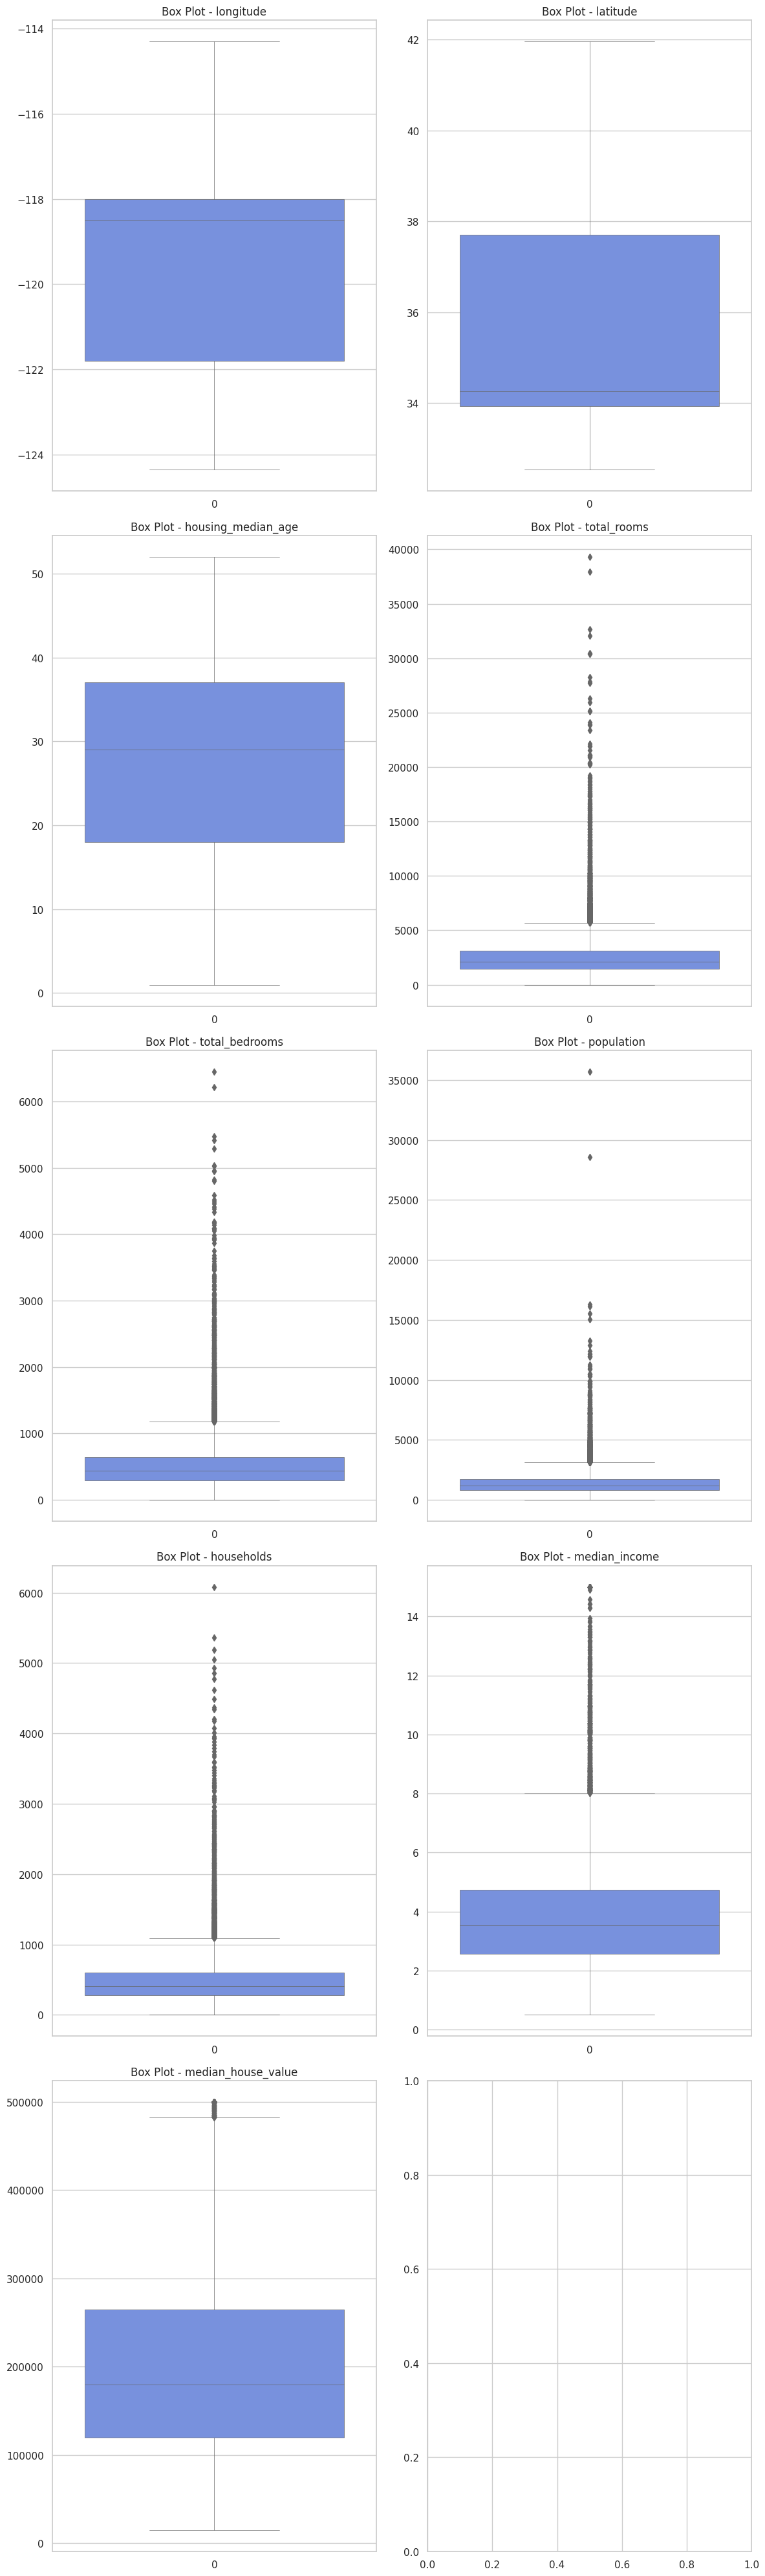

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the numeric_columns DataFrame already defined

sns.set(style="whitegrid")  # Set the style of the plot
sns.set_palette("coolwarm")  # Set the color palette

# Get the list of numeric column names
column_names = numeric_columns.columns

# Determine the number of rows and columns for the subplot grid
num_rows = (len(column_names) + 1) // 2  # Ensure at least 1 row
num_cols = 2

# figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8 * num_rows))  # Adjust the height here

# Flatten the axes array if it's a 2D array
axes = axes.flatten()

# Loop through each column and create a box plot on a subplot
for i, column in enumerate(column_names):
    sns.boxplot(data=numeric_columns[column], ax=axes[i], linewidth=0.5)
    axes[i].set_title(f"Box Plot - {column}")
    axes[i].set_xlabel("")  # Clear x-label to avoid overlap
    axes[i].set_ylabel("")  # Clear y-label to avoid overlap

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


There exist significant outliers. Let us not remove these outliers because we already saw in univarient model that the removal of outliers can slightly reduce the efficiency of the model. However we need to discuss with stakeholders to arrive at some mutual understanding for practical projects.

Let us predict median_house_value for all numerical predictor variables. Let us prepare our data as X and y for regression model.

X - Predictor Variables : longitude,  latitude,  housing_median_ag,  total_rooms,  total_bedrooms, population,  households,  median_income

y- Dependent (Target) Variables : median_house_value

(a) Ordinary Least Squares(OLS) method of linear regression

**Trial 1:**

In [ ]:
Xn = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']

param_grid = {
    'intercept': [1.0, 0.0]
}

# initialization for storing results
results = []
r_squared_values3 = []

for intercept_value in param_grid['intercept']:
    if intercept_value == 0:
        x = sm.add_constant(Xn)  # Include the intercept (default behavior)
    else:
        x = Xn  # Exclude the intercept

    model_OLS = sm.OLS(y, x)
    model_OLS_FIT = model_OLS.fit()
    r_squared = model_OLS_FIT.rsquared
    r_squared_values3.append(r_squared)
    results.append((intercept_value, model_OLS_FIT))

# Print the summary table for each model
for intercept_value, result in results:
    print(result.summary())
    print("=" * 80)

                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                          2.323e+04
Date:                Mon, 28 Aug 2023   Prob (F-statistic):                        0.00
Time:                        04:02:45   Log-Likelihood:                     -2.6094e+05
No. Observations:               20640   AIC:                                  5.219e+05
Df Residuals:                   20632   BIC:                                  5.220e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

From above notes, the housing data and the pairplots (which we saw earlier), we understand that there exists a similarity (collinearity) between total bedrooms and households. so we can drop total_bedrooms and see if our results can be improved.

Trial2:

In [ ]:
Xnn = housing.drop(columns=['median_house_value','total_bedrooms'])
y = housing['median_house_value']

param_grid = {
    'intercept': [0.0, 1.0]
}

# initialization for storing results
results = []
r_squared_values4 = []

for intercept_value in param_grid['intercept']:
    if intercept_value == 0:
        x = sm.add_constant(Xnn)  # Include the intercept (default behavior)
    else:
        x = Xnn  # Exclude the intercept

    model_OLS = sm.OLS(y, x)
    model_OLS_FIT = model_OLS.fit()
    r_squared = model_OLS_FIT.rsquared
    r_squared_values4.append(r_squared)
    results.append((intercept_value, model_OLS_FIT))

# Print the summary table for each model
for intercept_value, result in results:
    print(result.summary())
    print("=" * 80)

# Pickling the data and saving it to a file
# This pickling was done ONLY for this result, as this is the best model among the other regression models.  The same code can be used for all models if required.
with open('result.pickle', 'wb') as file:
    pickle.dump(result, file)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     5070.
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:02:45   Log-Likelihood:            -2.5954e+05
No. Observations:               20640   AIC:                         5.191e+05
Df Residuals:                   20632   BIC:                         5.192e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.506e+06   6.27

no much difference. Let us continue to get the prediction line

In [ ]:
mu, std = stats.norm.fit(model_OLS_FIT.resid)
mu, std

(-211.50634003802844, 75079.09117052777)

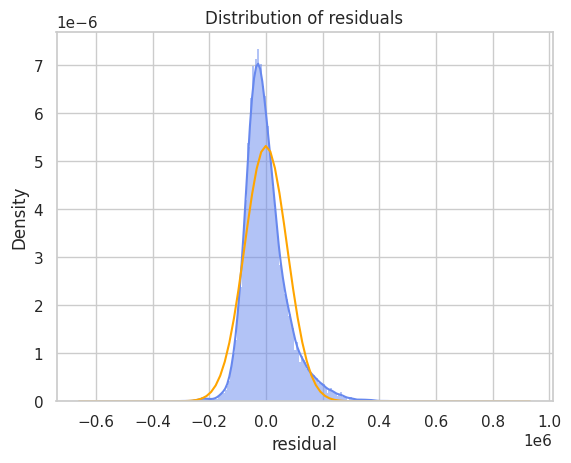

In [ ]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model_OLS_FIT.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

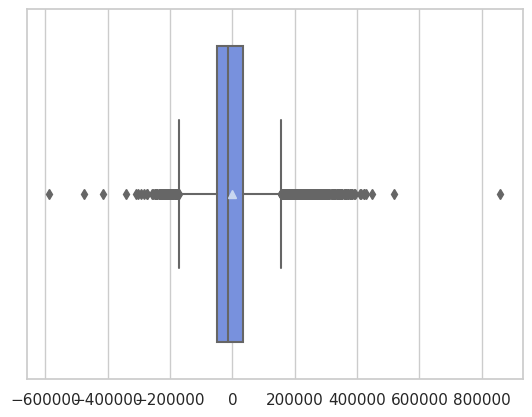

In [ ]:
sns.boxplot(x=model_OLS_FIT.resid, showmeans=True);

Let us save residuals (as first_trial) for the comparison at a later stage.

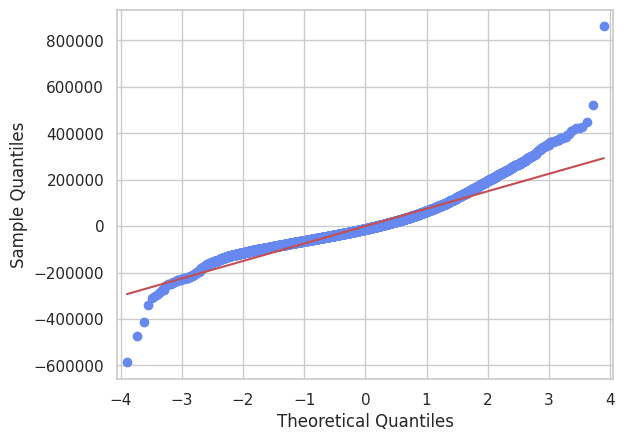

In [ ]:
sm.qqplot(model_OLS_FIT.resid, line='s');
first_trial = model_OLS_FIT.resid

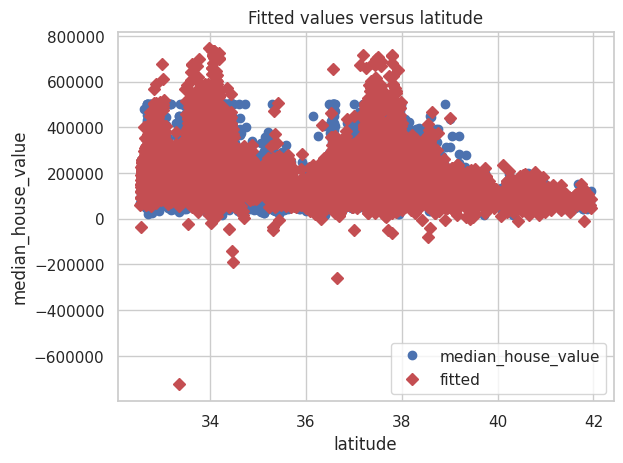

In [ ]:
sm.graphics.plot_fit(model_OLS_FIT,1, vlines=False);

In [ ]:
model_OLS_FIT.fittedvalues

0        402249.008161
1        416124.837962
2        371331.002905
3        308029.190315
4        232965.079179
             ...      
20635     69561.554469
20636     89073.948627
20637     70182.525290
20638     78223.012388
20639     96914.550801
Length: 20640, dtype: float64

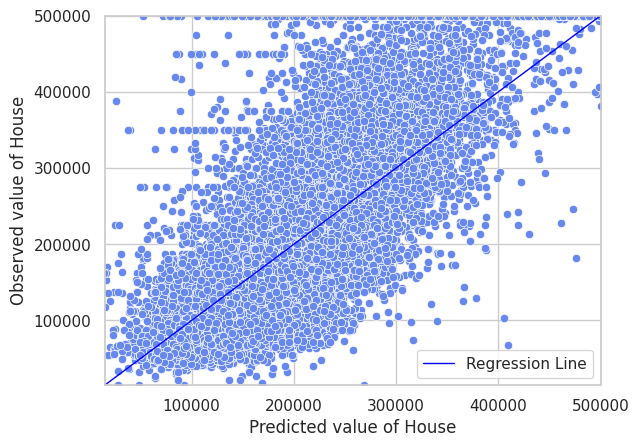

In [ ]:
Y_max = y.max()
Y_min = y.min()

# Plot the scatterplot of predicted vs. observed values
ax = sns.scatterplot(x=model_OLS_FIT.fittedvalues, y=y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of House")
ax.set_ylabel("Observed value of House")

# Add the intercept line
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
intercept = model_OLS_FIT.params[0]  # Get the intercept from the model
slope = model_OLS_FIT.params[1]  # Get the slope from the model
#plt.plot(X_ref, intercept + slope * X_ref, color='red', linewidth=1, label='Intercept Line')
plt.plot([Y_min, Y_max], [Y_min, Y_max], color='blue', linewidth=1, label='Regression Line')
plt.legend()  # Add a legend to label the intercept line
plt.show()

we got a decent prediction/regression line which can be used for getting prediction of median_house_value. we can STOP here but let us explore further

Let us categorize latitude and longitude & Generate summary description for the selected columns

In [ ]:
lat_lon_columns = housing[['latitude', 'longitude']]

lat_lon_des = lat_lon_columns.describe()
lat_lon_des

latitude     longitude
count  20640.000000  20640.000000
mean      35.631861   -119.569704
std        2.135952      2.003532
min       32.540000   -124.350000
25%       33.930000   -121.800000
50%       34.260000   -118.490000
75%       37.710000   -118.010000
max       41.950000   -114.310000

Categorizing code

In [ ]:
housing['lat_cit'] = pd.Series(pd.cut(housing['latitude'], [32, 34, 36, 38, 40, 42], labels=["la1",'la2',"la3",'la4','la5']))
housing['lon_cit'] = pd.Series(pd.cut(housing['longitude'], [-125, -122, -120, -118, -116, -114], labels=["lo1",'lo2',"lo3",'lo4','lo5']))
housing['lat_lon_cit'] = housing['lat_cit'].astype('str') + housing['lon_cit'].astype('str')
temp = pd.get_dummies(housing['lat_lon_cit'],drop_first=True)
housing = pd.concat([housing,temp],axis = 1)

In [ ]:
housing.sample(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13954    -117.10     34.21                22.0       4397.0           931.0   
12518    -121.46     38.55                52.0       3126.0           648.0   
11338    -117.97     33.75                32.0       1564.0           270.0   
7094     -118.00     33.91                19.0       5166.0           770.0   
6044     -117.74     34.05                27.0        852.0           237.0   
9939     -122.28     38.22                42.0        106.0            18.0   
4448     -118.21     34.07                47.0       1346.0           383.0   
8874     -118.45     34.06                52.0        204.0            34.0   
2553     -124.18     40.78                37.0       1453.0           293.0   
16500    -121.04     37.78                32.0       2916.0           528.0   

       population  households  median_income  median_house_value lat_cit  ...  \
13954      1145.0       445.0         4.5268            108400.0     la2  ...   
12518      1789.0       558.0         1.7616             84100.0     la4  ...   
11338       973.0       290.0         3.7500            190400.0     la1  ...   
7094       2374.0       753.0         5.9790            285200.0     la1  ...   
6044       1024.0       221.0         2.1141            110900.0     la2  ...   
9939         40.0        25.0         7.5197            275000.0     la4  ...   
4448       1452.0       371.0         1.7292            191700.0     la2  ...   
8874       1154.0        28.0         9.3370            500001.0     la2  ...   
2553        867.0       310.0         2.5536             70200.0     la5  ...   
16500      1466.0       473.0         2.5643            200000.0     la3  ...   

      la2lo5 la3lo1  la3lo2  la3lo3  la3lo4  la4lo1  la4lo2  la4lo3  la5lo1  \
13954      0      0       0       0       0       0       0       0       0   
12518      0      0       0       0       0       0       1       0       0   
11338      0      0       0       0       0       0       0       0       0   
7094       0      0       0       0       0       0       0       0       0   
6044       0      0       0       0       0       0       0       0       0   
9939       0      0       0       0       0       1       0       0       0   
4448       0      0       0       0       0       0       0       0       0   
8874       0      0       0       0       0       0       0       0       0   
2553       0      0       0       0       0       0       0       0       1   
16500      0      0       1       0       0       0       0       0       0   

       la5lo2  
13954       0  
12518       0  
11338       0  
7094        0  
6044        0  
9939        0  
4448        0  
8874        0  
2553        0  
16500       0  

[10 rows x 27 columns]

Data transformation after adding new columns

In [ ]:
column_names = housing.columns.tolist()
print(column_names)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'lat_cit', 'lon_cit', 'lat_lon_cit', 'la1lo4', 'la1lo5', 'la2lo2', 'la2lo3', 'la2lo4', 'la2lo5', 'la3lo1', 'la3lo2', 'la3lo3', 'la3lo4', 'la4lo1', 'la4lo2', 'la4lo3', 'la5lo1', 'la5lo2']


In [ ]:
# RE-ORGANIZING THE DATA to numeric predictor variables
Xs1 = housing.drop(columns=['median_house_value', 'latitude', 'longitude', 'lat_lon_cit','lat_cit','lon_cit'])


Trial after transformation:(basic linear regression)

In [ ]:
# standardization
object= StandardScaler()
scale = object.fit_transform(Xs1)

# adding the constant term
X_with_constant = sm.add_constant(Xs1)

# Performing the OLS regression
model_OLS = sm.OLS(y, X_with_constant, missing='drop')

# Fitting the model
model_OLS_FIT = model_OLS.fit()

# Printing the summary table
print(model_OLS_FIT.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1681.
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:02:49   Log-Likelihood:            -2.5957e+05
No. Observations:               20640   AIC:                         5.192e+05
Df Residuals:                   20618   BIC:                         5.194e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.842e+04   2870

the results did not improve. So let us apply Regularization

Ridge -Lasso Regularization

In [ ]:
Xs1 = housing.drop(columns=['median_house_value', 'latitude', 'longitude', 'lat_lon_cit','lat_cit','lon_cit'])

Additional Trial: (Regularized Regression Model)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Assuming you have your features X and target y
X_train, X_test, y_train, y_test = train_test_split(Xs1, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge and Lasso regularization parameters to tune
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Ridge and Lasso regression models
ridge = Ridge()
lasso = Lasso()

# Create GridSearchCV for hyperparameter tuning
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5)
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5)

# Fit Ridge and Lasso models with best hyperparameters
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best alpha for Ridge and Lasso
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_alpha_lasso = grid_search_lasso.best_params_['alpha']

# Create Ridge and Lasso models with best hyperparameters
best_ridge = Ridge(alpha=best_alpha_ridge)
best_lasso = Lasso(alpha=best_alpha_lasso)

# Fit Ridge and Lasso models on the training data
best_ridge.fit(X_train_scaled, y_train)
best_lasso.fit(X_train_scaled, y_train)

# Predictions
ridge_pred = best_ridge.predict(X_test_scaled)
lasso_pred = best_lasso.predict(X_test_scaled)

# Evaluate using R-squared
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Best Alpha (Ridge):", best_alpha_ridge)
print("Best Alpha (Lasso):", best_alpha_lasso)
print("Ridge R-squared:", ridge_r2)
print("Lasso R-squared:", lasso_r2)


Best Alpha (Ridge): 100
Best Alpha (Lasso): 100
Ridge R-squared: 0.6219081458898089
Lasso R-squared: 0.6219744987597255


The regularization did not help to improve Regression Results. so the best result is based on Multivarient Linear Regression without Intercept (R-Squared: 0.9). Let us re-plot the regression/prediction line

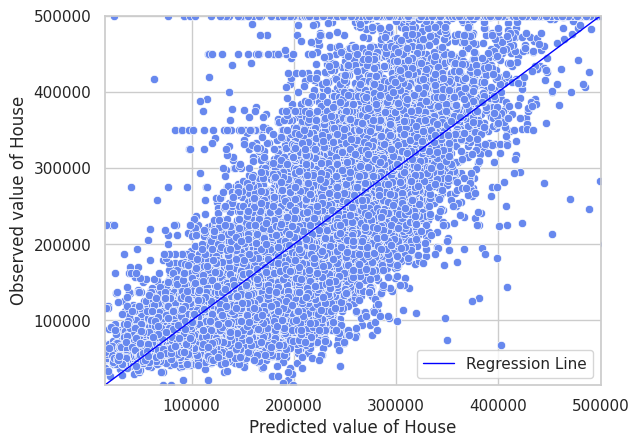

In [ ]:
Y_max = y.max()
Y_min = y.min()

# Plot the scatterplot of predicted vs. observed values
ax = sns.scatterplot(x=model_OLS_FIT.fittedvalues, y=y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of House")
ax.set_ylabel("Observed value of House")

# Add the intercept line
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
intercept = model_OLS_FIT.params[0]  # Get the intercept from the model
slope = model_OLS_FIT.params[1]  # Get the slope from the model
#plt.plot(X_ref, intercept + slope * X_ref, color='red', linewidth=1, label='Intercept Line')
plt.plot([Y_min, Y_max], [Y_min, Y_max], color='blue', linewidth=1, label='Regression Line')
plt.legend()  # Add a legend to label the intercept line
plt.show()

**Conclusion:**
   to predict California housing value, Linear Regression modellings were carried out.
  1) Studied the data and tried to get meaningful insights in a systematic way.
  2) Interdependencies of columns were studied for missing data
 3) first an univarient modelling was carriedout. i.e from the Housing data.  
   Median income was considered as the independent/predictor variable and     
   median_house_value was considered as target variable.
   Where the linear regression was carriedout with and without intercept.
 4) For univariant Linear Regression Model,  we can clearly see that the R-Squared value is 0.86 and to save time, we can very well stop the modelling here.
5) But for the sake of completeness, Multi-varaiant Linear regression was carried out. The result of R square and other parameters improved a lot. The R-Square became 0.9.
6) For Regularization, we had to split the data into training and testing. Linear regression with and without regularization was carried out, but the results dropped. So the best result among the models is acheived by multi-varient OLS Linear Regression Model



 Use the above figure as the prediction line for estimating california housing value